### 머신러닝 과정
1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. 탐색적 데이터 분석(EDA)
5. 모델 선택 및 학습
6. 모델 평가

### 1. 문제 정의
- 탑승객의 정보를 바탕으로 생존/사망자를 예측
- kaggle 경진대회에서 높은 순위를 차지
- 머신러닝 전체 과정을 체험해보는 실습

### 2. 데이터 수집
- kaggle 사이트로부터 다운로드

In [852]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [853]:
# 데이터 로드
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [854]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [855]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3. 데이터 전처리
- 불필요한 컬럼 삭제
- 결측치 채우기(데이터 삭제,기술통계,상관게수를 통한 대체 값)
- 특성공학
- 새로운 컬럼 만들기
- 범주형 데이터로 바꾸기
- 모든 컬럼 수치화

In [856]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [857]:
train.drop('PassengerId',axis=1,inplace=True)

In [858]:
train.shape

(891, 11)

In [859]:
# train과 test는 동일한 전처리를 해줘야 한다
test.drop('PassengerId',axis=1,inplace=True)

In [860]:
test.shape

(418, 10)

In [861]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [862]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


##### Embarked 결측치 채우기

In [863]:
# 어떤 값들이 있는지 확인
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [864]:
#값들이 많은 순서
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [865]:
#가장많은 값으로 결측치 채우기
train['Embarked'].fillna('S',inplace=True)

In [866]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Fare 채우기

In [867]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [868]:
#상관계수 : -1~1 사이값
# A,B 중 A가 증가할때 B가 증가/감소 할때 두 변수의 관계를 나타냄
#절댓값이 가장 큰 특성이 상관도가 높다고 해석(-0.7과 0.3중에선 -0.7선택)
train.corr()
# 다른컬럼과의 상관관계를 통해 결측치를 채워보자

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Pclass가 가장 높은 상관관계를 가진다!
- 생존/사망 판단에 관련이 높아 보이는 성별을 함께 활용해보자!

In [869]:
pt1=train.pivot_table(values='Fare',
                 index=['Pclass','Sex'],
                 aggfunc='mean')

In [870]:
pt1

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [871]:
#불리언인덱싱 결측치인 데이터찾기
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [872]:
test['Fare'].fillna(12.66,inplace=True)
# 피벗테이블 활용하여 결측치 채우기

In [873]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [874]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Age 결측치 채우기

In [875]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [876]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [877]:
pt2=train.pivot_table(values='Age',
                 index=['Pclass','Sex'],#멀티인덱스
                 aggfunc='mean')

In [878]:
pt2

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [879]:
#Pclass 1에 female 인 나이값 가져오기
pt2.loc[1,'female']

Age    34.611765
Name: (1, female), dtype: float64

In [880]:
pt2.loc[3,'male']

Age    26.507589
Name: (3, male), dtype: float64

In [881]:
#함수 생성
#결측치 한번에 채우는 함수만들기
def fill_age(row):
    #만약 나이가 결측치라면 pt2에서 값을 가져오고
    if np.isnan(row['Age']):
        return pt2.loc[row['Pclass'],row['Sex']]
    #아니면 원래 나이 값을 사용
    else :
        return row['Age']

In [882]:
#트레인은 2차원이기때문에 axis=1
#apply : 내가 만든 함수를 DataFrame에 적용할 때 쓰는 함수
train['Age']=train.apply(fill_age,axis=1).astype('int64')

In [883]:
test['Age']=train.apply(fill_age,axis=1).astype('int64')

In [884]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 32.8+ KB


In [885]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


##### Cabin 결측치 채우기

In [886]:
#데이터 값들 종류
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- Cabin의 범주가 너무 많으니 종류를 줄여보자! (맨 앞에 알파벳(A,B..)만 가져오기) ->모델이 복잡해지는것을 방지 (과대적합)
- 결측치를 하나의 데이터로 활용!

In [887]:
#내부 문자열 접근 str 그중에 첫번째 [0]
train['Cabin']=train['Cabin'].str[0]

In [888]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [889]:
train['Cabin'].fillna('M',inplace=True)

In [890]:
#내부 문자열 접근 str 그중에 첫번째 [0]
train['Cabin']=train['Cabin'].str[0]
test['Cabin']=test['Cabin'].str[0]
test['Cabin'].fillna('M',inplace=True)


In [891]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [892]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 32.8+ KB


### 4. 탐색적 데이터 분석(EDA)
- train 데이터를 이용해 탐색을 한다

#### 범주형 데이터 시각화
- 빈도 기반의 bar char를 많이 활용한다!

#### Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

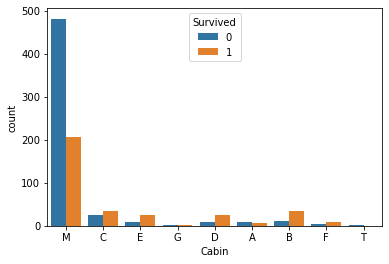

In [893]:
sns.countplot(data=train,
             x='Cabin',
             hue='Survived')

- M(결측치)에서 상대적으로 많은 사람들이 사망했다.모델 학습에 의미가 있을 수 있겠다

##### Pclass 시각화

<AxesSubplot:xlabel='count', ylabel='Pclass'>

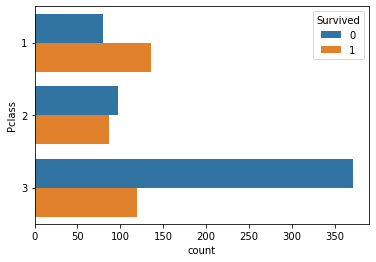

In [894]:
sns.countplot(data=train,
             y='Pclass',
             hue='Survived')

- 1등급 탑승객은 생존 확률이 좀 더 있다.
- 3등급 탑승객은 사망 확률이 많다.
- 등급이 높아질수록 (3->1) 생존 확률이 높아진다.
- Pclass를 모델에게 이용해도 괜찮을 것 같다.

##### Pclass와 Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

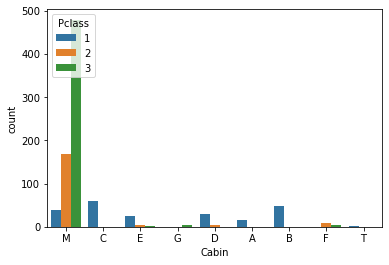

In [895]:
sns.countplot(data=train,
             x='Cabin',
             hue='Pclass')

- A,B,C는 1등급 사람들이 탑승했다.
- 아랫쪽(D,E..)으로 갈수록 2,3등급 탑승객들이 보이기 시작한다.
- M(결측치)은 3등급 탑승객들이 많다 -> 3등급 사람들이 많이 사망해서 정보가 손실되었을수도 있겠다??

##### Embarked 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

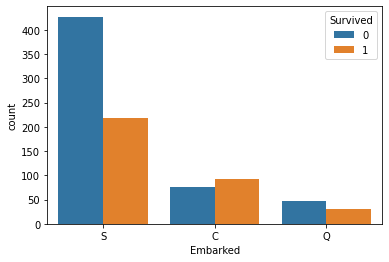

In [896]:
sns.countplot(data=train,
             x='Embarked',
             hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

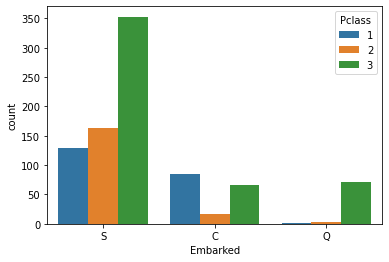

In [897]:
sns.countplot(data=train,
             x='Embarked',
             hue='Pclass')

#### Sex 시각화

<AxesSubplot:xlabel='Sex', ylabel='count'>

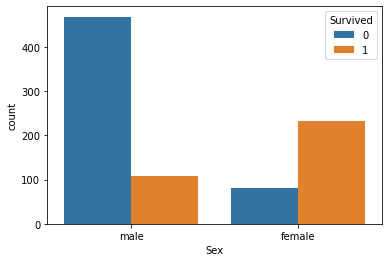

In [898]:
sns.countplot(data=train,
             x='Sex',
             hue='Survived')

#### 수치형 데이터
- 구간을 나누어서 종합하는 히스토그램
- 커널밀도추정 그래프


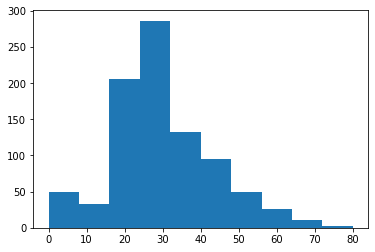

In [899]:
plt.hist(train['Age'])
plt.show()

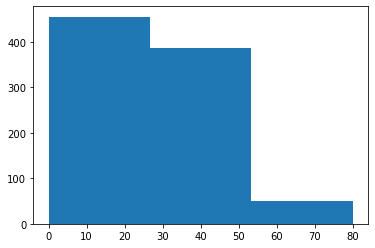

In [900]:
plt.hist(train['Age'],bins=3)
plt.show()

##### Age 시각화

<AxesSubplot:xlabel='Sex', ylabel='Age'>

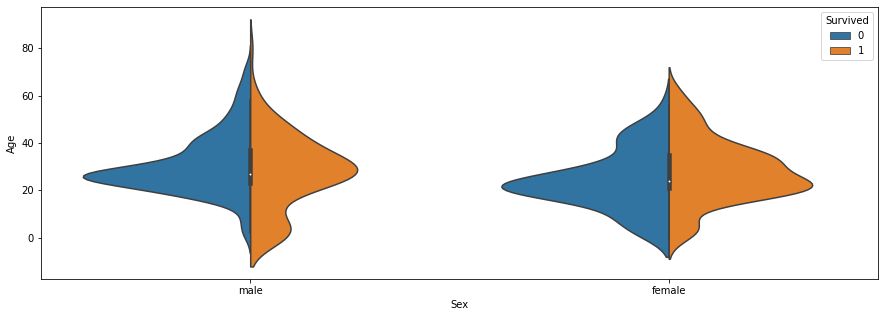

In [901]:
plt.figure(figsize=(15,5))
sns.violinplot(data=train,
              y='Age',
               x='Sex',
              hue='Survived',
              split=True)

- 20대 남성인 경우 사망 확률이 더 높다
- 어린 남자아이인 경우 생존 확률이 더 높다(어린 여자아이는 사망 확률이 좀 더 높다)

#### Fare 시각화

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

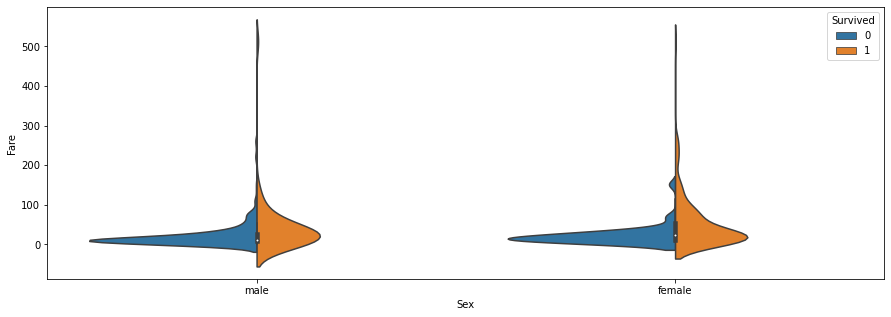

In [902]:
plt.figure(figsize=(15,5))
sns.violinplot(data=train,
              y='Fare',
              x='Sex',
              hue='Survived',
              split=True)

- 낮은 요금을 지불한 많은 사람들이 사망했다.
- 전체 요금 0~40달러 사이에 많이 분포되어 있다.
- 아주 많은 요금을 낸 소수의 사람들은 대체로 생존했다.

#### 특성공학
- SipSp와 Parch를 합쳐서 '가족'이라는 새로운 칼럼 생성

In [903]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S


In [904]:
train['Family_Size']=train['SibSp']+train['Parch']+1

In [905]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,2
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S,1


In [906]:
test['Family_Size']=test['SibSp']+test['Parch']+1

In [907]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,3,"Kelly, Mr. James",male,22,0,0,330911,7.8292,M,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,38,1,0,363272,7.0000,M,S,2
2,2,"Myles, Mr. Thomas Francis",male,26,0,0,240276,9.6875,M,Q,1
3,3,"Wirz, Mr. Albert",male,35,0,0,315154,8.6625,M,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35,1,1,3101298,12.2875,M,S,3


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

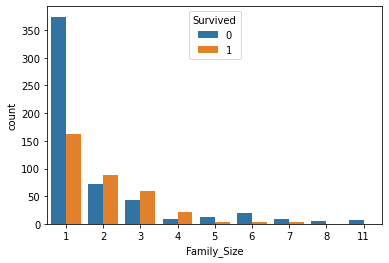

In [908]:
sns.countplot(data=train,
             x='Family_Size',hue='Survived')

- 1명일 경우 사망 비율이 높다
- 2~4명일 경우 생존 비율이 더 높다
- 5명 이상일 경우 사망 비율이 더 높다
- Family_Size의 수치 데이터를 그대로 활용해도 좋지만, 범주형 데이터로 변환시켜보자
- Binning(수치형->범주형) : 사소한 관찰 오류를 줄여준다. 모델 학습의 단순화를 유도할 수 있다.



#### 특성공학
- 가족의 수가 1이면 Alone,2~4명이면 Small, 5명 이상일 경우 Large 범주로 변경
- cut 함수 활용

In [909]:
bins = [0,1,4,20]
labels = ['Alone','Small','Large']
train['Family_Group']=pd.cut(x=train['Family_Size'],
      bins=bins,
      labels=labels)

In [910]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small


<AxesSubplot:xlabel='Family_Group', ylabel='count'>

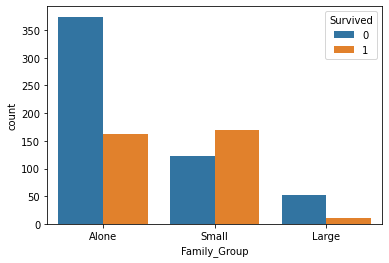

In [911]:
sns.countplot(data=train,
             x='Family_Group',hue='Survived')

In [912]:

test['Family_Group']=pd.cut(x=test['Family_Size'],
      bins=bins,
      labels=labels)

In [913]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group
0,3,"Kelly, Mr. James",male,22,0,0,330911,7.8292,M,Q,1,Alone
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,38,1,0,363272,7.0000,M,S,2,Small
2,2,"Myles, Mr. Thomas Francis",male,26,0,0,240276,9.6875,M,Q,1,Alone
3,3,"Wirz, Mr. Albert",male,35,0,0,315154,8.6625,M,S,1,Alone
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35,1,1,3101298,12.2875,M,S,3,Small


##### 특성공학
- text 데이터 다루기(비정형 데이터)
- Name 컬럼 : 중간에 있는 호칭 정보만 뽑아보자! (->정형화 시키자)


In [914]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [915]:
'Braund, Mr.Owen Harris'.split(',')

['Braund', ' Mr.Owen Harris']

In [916]:
'Braund, Mr.Owen Harris'.split(',')[1]

' Mr.Owen Harris'

In [917]:
'Braund, Mr.Owen Harris'.split(',')[1].split('.')

[' Mr', 'Owen Harris']

In [918]:
'Braund, Mr.Owen Harris'.split(',')[1].split('.')[0]

' Mr'

In [919]:
'Braund, Mr.Owen Harris'.split(',')[1].split('.')[0].strip()

'Mr'

In [920]:
# 함수 생성
def split_title(row):
    return row.split(',')[1].split('.')[0].strip()


In [921]:
train['Title']=train['Name'].apply(split_title)

In [922]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small,Mr


In [923]:
test['Title']=test['Name'].apply(split_title)

In [924]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
0,3,"Kelly, Mr. James",male,22,0,0,330911,7.8292,M,Q,1,Alone,Mr


In [925]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [926]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Title'>

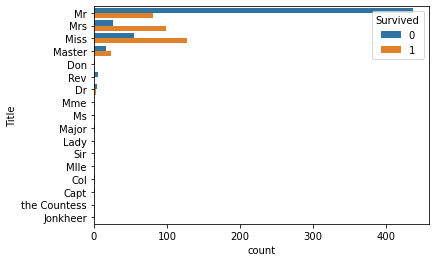

In [927]:
sns.countplot(data=train,
             y='Title',hue='Survived')

(0.0, 20.0)

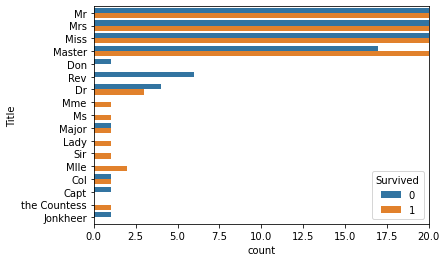

In [928]:
sns.countplot(data=train,
             y='Title',hue='Survived')
plt.xlim(0,20)
#값 범위지정 lim
#그래프 크기조절 plt.figure(figsize=(?,?))

- Mr, Mrs, Miss, Master : 성별과 관련된 호칭들을 머신러닝 모델 학습에 사용해봐도 괜찮겠다.
- 나머지 호칭들은 인원수가 적고 종류가 많아서 범주를 통합시켜보는게 좋겠다! (단순화 시켜보기)

In [929]:
#데이터 함축
# map 함수 사용하기
# 값이없으면 널값출력 null ,객체형태로 담아주기
title_dic={
    'Mr' : 'Mr',
    'Mrs':'Mrs',
    'Miss':'Miss',
    'Master':'Master',
    'Don' :'Other',
    'Rev':'Other',
    'Dr':'Other',
    'Mme':'Miss',
    'Ms':'Miss',
    'Major':'Other',
    'Lady':'Miss',
    'Sir':'Other',
    'Mlle':'Miss',
    'Col':'Other',
    'Capt':'Other',
    'the Countess':'Other',
    'Jonkheer':'Other',
    'Dona':'Other'
}

In [930]:
train['Title2']=train['Title'].map(title_dic)

In [931]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title,Title2
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small,Mr,Mr


In [932]:
train['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [933]:
test['Title2']=test['Title'].map(title_dic)

In [934]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title,Title2
0,3,"Kelly, Mr. James",male,22,0,0,330911,7.8292,M,Q,1,Alone,Mr,Mr


In [935]:
test['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [936]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title,Title2
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,2,Small,Mr,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2,Small,Mrs,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,1,Alone,Miss,Miss


#### Ticket 정보는 사용하지 않겠다.
### 사용하지 않을 컬럼 정리

In [937]:
#컬럼명 확인
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Group', 'Title',
       'Title2'],
      dtype='object')

In [938]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family_Size', 'Family_Group', 'Title', 'Title2'],
      dtype='object')

In [939]:
train.drop(['Name','Title','Ticket'],axis=1,inplace=True)

In [940]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Group,Title2
0,0,3,male,22,1,0,7.2500,M,S,2,Small,Mr
1,1,1,female,38,1,0,71.2833,C,C,2,Small,Mrs
2,1,3,female,26,0,0,7.9250,M,S,1,Alone,Miss
3,1,1,female,35,1,0,53.1000,C,S,2,Small,Mrs
4,0,3,male,35,0,0,8.0500,M,S,1,Alone,Mr


In [941]:
test.drop(['Name','Title','Ticket'],axis=1,inplace=True)

In [942]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Group,Title2
0,3,male,22,0,0,7.8292,M,Q,1,Alone,Mr
1,3,female,38,1,0,7.0000,M,S,2,Small,Mrs
2,2,male,26,0,0,9.6875,M,Q,1,Alone,Mr
3,3,male,35,0,0,8.6625,M,S,1,Alone,Mr
4,3,female,35,1,1,12.2875,M,S,3,Small,Mrs


In [943]:
train.shape,test.shape

((891, 12), (418, 11))

### 5. 모델링
- 인코딩(문자 형태의 데이터를 숫자 형태로 변환)
    1. label encoding
    2. one-hot encoding
- 모델 선택 및 하이퍼파라미터 조정
- 모델학습
- 모델평가

In [944]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_Size', 'Family_Group', 'Title2'],
      dtype='object')

In [945]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Group,Title2
0,0,3,male,22,1,0,7.2500,M,S,2,Small,Mr
1,1,1,female,38,1,0,71.2833,C,C,2,Small,Mrs


In [946]:
#원핫인코딩 문자데이터 컬럼 여러개
# 문자열로 이루어진 특성
categorical_features=['Sex','Cabin','Embarked','Family_Group','Title2']

In [947]:
#prefix : 원래 데이터값도 보여줌
pd.get_dummies(train['Title2'],prefix='Title2')

,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [948]:
for feature_name in categorical_features:
    # 원-핫 인코딩
    one_hot=pd.get_dummies(train[feature_name],prefix=feature_name)
    # 기존 문자 형태 컬럼 삭제
    train.drop(feature_name,axis=1,inplace=True)
    # 기존 train 데이터에 원-핫 데이터 병합하기 (기존데이터 삭제 후)
    train = pd.concat([train,one_hot], axis=1)
    
    

In [949]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,0,3,22,1,0,7.2500,2,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,1,1,38,1,0,71.2833,2,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [950]:
# for feature_name in categorical_features:
#     # 원-핫 인코딩
#     one_hot=pd.get_dummies(test[feature_name],prefix=feature_name)
#     # 기존 문자 형태 컬럼 삭제
#     test.drop(feature_name,axis=1,inplace=True)
#     # 기존 train 데이터에 원-핫 데이터 병합하기 (기존데이터 삭제 후)
#     test = pd.concat([test,one_hot], axis=1)
    

for features_name in categorical_features:
    # 원-핫 인코딩
    one_hot = pd.get_dummies(test[features_name], prefix=features_name)
    # 기존 문자 형태 컬럼 삭제
    test.drop(features_name, axis=1,inplace = True)
    # 기존 train 데이터에 원-핫 데이터 병합하기 (기존데이터 삭제 후)
    test = pd.concat([test,one_hot], axis = 1)

In [951]:
test.head()
#train에는 Cabin_T컬럼이 있는데 test에는 없다 왜?
#train의 Cabin컬럼에는 'T'데이터가 있는데 test에는 없어서
#원-핫 인코딩을 진행할 때 만들어지지 않았다.
#원-핫 인코딩 ->범주 데이터만큼의 특성을 만들어서 표현

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,3,22,0,0,7.8292,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,3,38,1,0,7.0000,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,2,26,0,0,9.6875,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
3,3,35,0,0,8.6625,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
4,3,35,1,1,12.2875,3,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [952]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [953]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [954]:
# 머신러닝 학습시 특성의 수와 순서가 맞아야한다!
# test에 Cabin_T 컬럼을 만들어주자(0값으로 이루어진 컬럼을 만들면 표현 가능)
test['Cabin_T']=0

In [955]:
# Cabin_T 라는 컬럼을 만들어서 0값으로 채워주기

test['Cabin_T']=0

In [956]:
test['Cabin_T']


0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Cabin_T, Length: 418, dtype: int64

In [957]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [958]:
# 집합 만들기
set(train.columns)

{'Age',
 'Cabin_A',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_M',
 'Cabin_T',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Family_Group_Alone',
 'Family_Group_Large',
 'Family_Group_Small',
 'Family_Size',
 'Fare',
 'Parch',
 'Pclass',
 'Sex_female',
 'Sex_male',
 'SibSp',
 'Survived',
 'Title2_Master',
 'Title2_Miss',
 'Title2_Mr',
 'Title2_Mrs',
 'Title2_Other'}

In [959]:
#차집합 연산
set(test.columns)-set(train.columns)

set()

In [960]:
#컬럼차이 알기
set(train.columns)-set(test.columns)

{'Survived'}

In [1043]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [961]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other', 'Cabin_T'],
      dtype='object')

In [962]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,0,3,22,1,0,7.2500,2,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,1,1,38,1,0,71.2833,2,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,3,26,0,0,7.9250,1,1,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,35,1,0,53.1000,2,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,3,35,0,0,8.0500,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1,0,1,0,...,0,1,1,0,0,0,0,0,0,1
887,1,1,19,0,0,30.0000,1,1,0,0,...,0,1,1,0,0,0,1,0,0,0
888,0,3,21,1,2,23.4500,4,1,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,26,0,0,30.0000,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [963]:
X_train=train.drop('Survived',axis=1)
y_train=train['Survived']


In [964]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,3,22,1,0,7.2500,2,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,38,1,0,71.2833,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,26,0,0,7.9250,1,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,35,1,0,53.1000,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,3,35,0,0,8.0500,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
887,1,19,0,0,30.0000,1,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0
888,3,21,1,2,23.4500,4,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,26,0,0,30.0000,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [965]:
# 순서를 맞춰주자!
# 컬럼 순서 맞추기 
# 오류나면 컬럼 순서 맞추기 train과 test
X_test=test[X_train.columns]
#y_test는 없다 ->케글에 있음

In [966]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [967]:
# 모델 생성
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

#### train,validation 분리
- 우리는 케글 데이터를 다루는중 y_test가 없어서 검증단계가 필요
- 케글이 아니더라도 test에 맞춰진 학습이 될수 있음(과대적합우려)->검증단계를 한 번 더 거쳐보자

In [968]:
from sklearn.model_selection import train_test_split

In [969]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train)

In [970]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((668, 28), (223, 28), (668,), (223,))

#### 모델 학습 및 평가

In [971]:
knn_model.fit(X_train,y_train)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [972]:
knn_model.score(X_val,y_val)

0.7309417040358744

In [973]:
tree_model.score(X_val,y_val)

0.7668161434977578

#### 7.0.4 교차검증

In [974]:
from sklearn.model_selection import cross_val_score

In [975]:
# (모델,문제,정답,몇 겹인지)
knn_result=cross_val_score(knn_model,X_train,y_train,cv=5)
knn_result

array([0.73880597, 0.70149254, 0.70149254, 0.7443609 , 0.73684211])

In [976]:
knn_result.mean()

0.7245988104589832

In [977]:
tree_result=cross_val_score(tree_model,X_train,y_train,cv=5)

In [978]:
tree_result.mean()

0.7875322634945572

#### 7.0.5 하이퍼파라미터 튜닝

In [979]:
score_list=[]
for k in range(1,150):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_result= cross_val_score(knn_model,X_train,y_train,cv=5)
    score_list.append(knn_result.mean())

In [980]:
score_list

[0.7125799573560768,
 0.7126360677813938,
 0.7500504993827853,
 0.7230726068903601,
 0.7245988104589832,
 0.7320951632813377,
 0.7380989787902592,
 0.7096734373246548,
 0.7231399394007407,
 0.7365615531365728,
 0.7275951071709124,
 0.7290876444843452,
 0.7410840534171249,
 0.73506901582314,
 0.7291100886544719,
 0.7290764223992817,
 0.729110088654472,
 0.7305577376276511,
 0.7231062731455504,
 0.7186174391201885,
 0.7141286050948266,
 0.71413982717989,
 0.7156211424082595,
 0.7245763662888565,
 0.7290876444843452,
 0.7245763662888565,
 0.7230838289754236,
 0.715609920323196,
 0.7096173268993379,
 0.7066434743575357,
 0.706654696442599,
 0.7066883626977892,
 0.7021883065873639,
 0.7066771406127259,
 0.711177196723151,
 0.7052070474694198,
 0.7037032880709236,
 0.7066883626977892,
 0.7081809000112221,
 0.7081809000112221,
 0.705184603299293,
 0.7066995847828527,
 0.7036920659858602,
 0.7096958814947818,
 0.7051958253843564,
 0.6992032319604983,
 0.7021883065873639,
 0.6992256761306251,
 

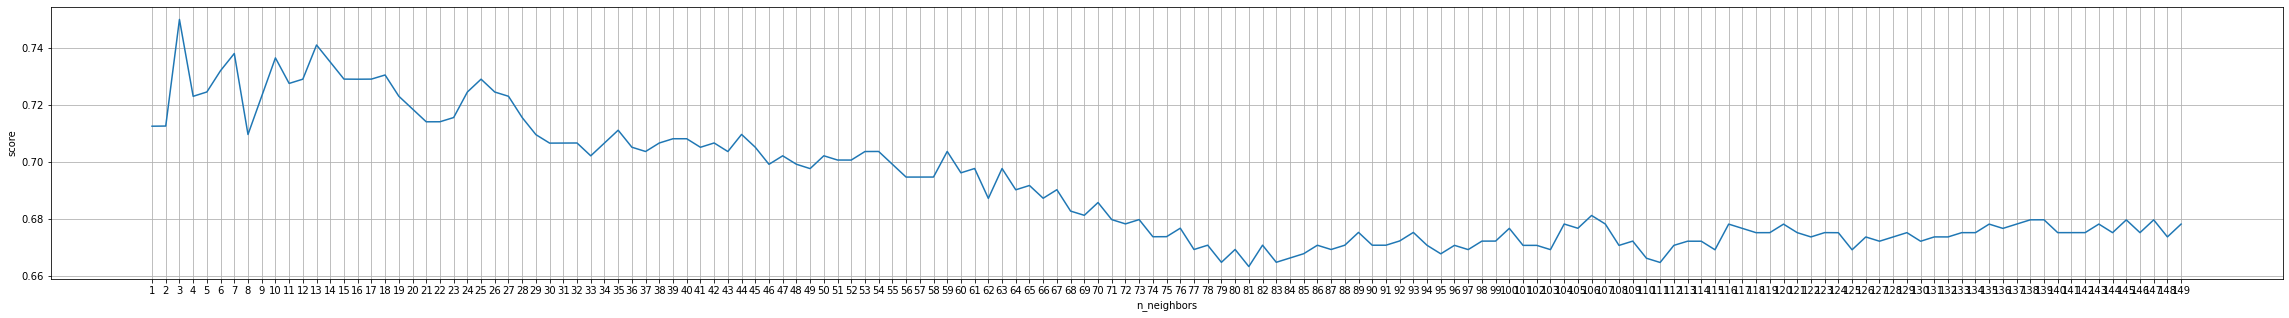

In [981]:
plt.figure(figsize=(40,5))
plt.plot(range(1,150),score_list)
plt.xticks(range(1,150))
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.grid()
plt.show()
#n_neighbors가 9인 모델로

In [982]:
# score_list2=[]
# for k in range(1,150):
#     knn_model = KNeighborsClassifier(n_neighbors=9)
#     knn_result= cross_val_score(knn_model,X_train,y_train,cv=5)
#     score_list2.append(knn_result.mean())

In [983]:
# plt.figure(figsize=(40,5))
# plt.plot(range(1,150),score_list2)
# plt.xticks(range(1,150))
# plt.xlabel('n_neighbors')
# plt.ylabel('score')
# plt.grid()
# plt.show()

In [984]:
#딕션트리모델00 스케일러 안해도 된다.
score_list3=[]
for d in range(1,150):
    tree_model = DecisionTreeClassifier(max_depth=d)
    tree_result= cross_val_score(tree_model,X_train,y_train,cv=5)
    score_list3.append(tree_result.mean())

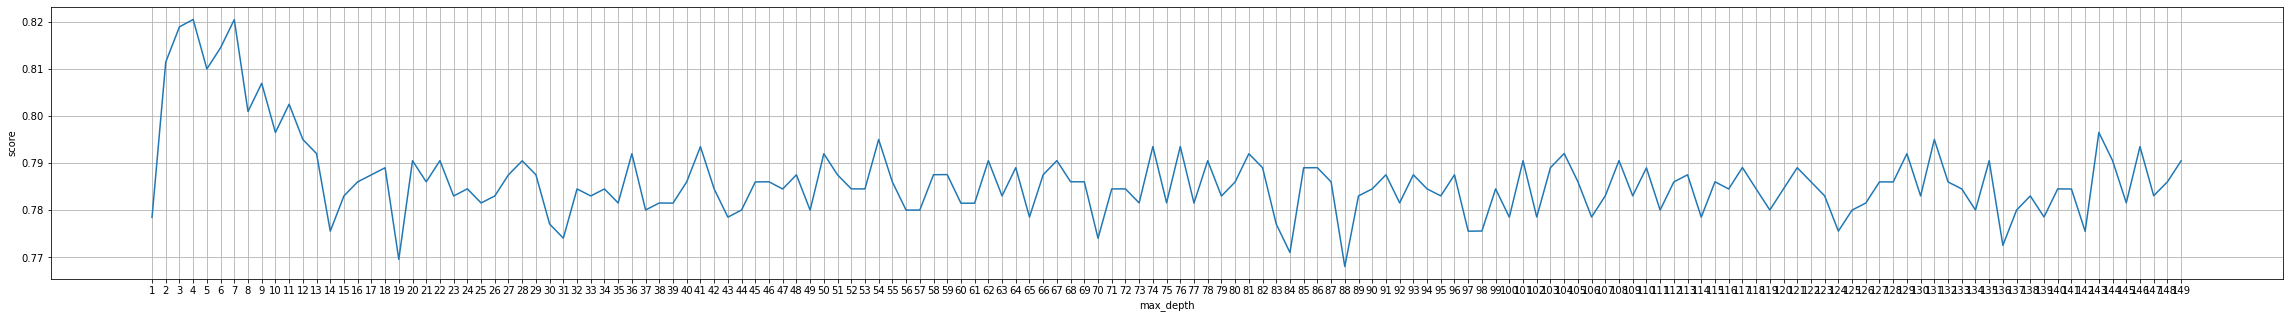

In [985]:
plt.figure(figsize=(40,5))
plt.plot(range(1,150),score_list3)
plt.xticks(range(1,150))
plt.xlabel('max_depth')
plt.ylabel('score')
plt.grid()
plt.show()
#max_depth가 3인 모델로

In [986]:
# 최종모델 선택
final_tree=DecisionTreeClassifier(max_depth=3)
final_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [987]:
#채점하기 성능
cross_val_score(final_tree,X_train,y_train,cv=5).mean()

0.8203680843900797

In [988]:
pre=final_tree.predict(X_test)

#### 7.0.6 예측하기

In [989]:
#케글 파일 불러오기
submission=pd.read_csv('gender_submission.csv')

In [990]:
submission.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [991]:
#pre 값을 담아주기
submission['Survived']=pre

In [992]:
#파일로 저장하기
submission.to_csv('tree_model_submission_first.csv',index=False)

In [993]:
#케글사이트에 파일 제출해보기

##### 성능개선을 위해 고려해볼 사항
1. feature selection (특성 선택)
2. 전처리 작업 변경 (결측치, 특성공학, 스케일링 등)
3. 데이터 확보
4. 모델 변경(앙상블 모델)

#### 7.0.7  Fare 데이터를 정규 분포로 변환

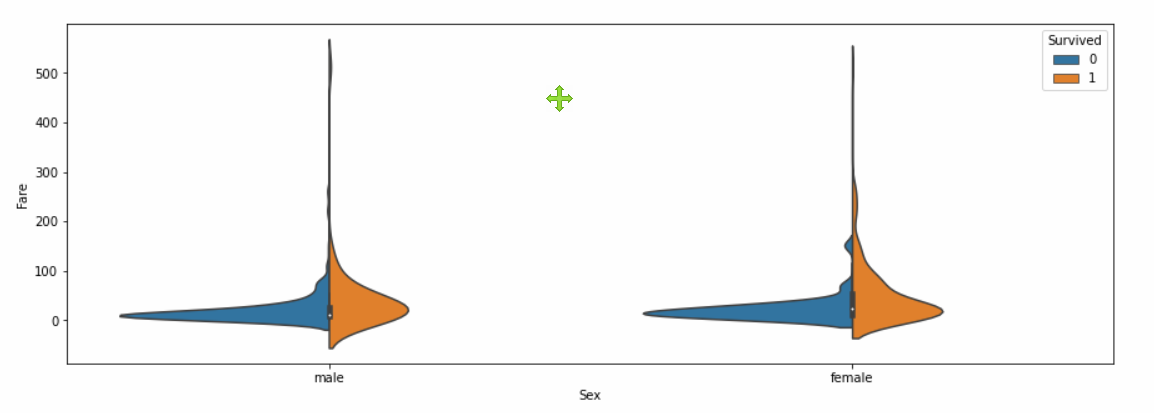

C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


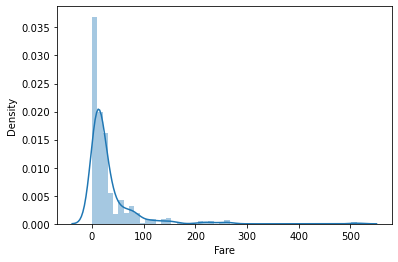

In [994]:
sns.distplot(train['Fare'])#Density
plt.show()

In [995]:
#요금의 분포가 굉장히 비대칭적 -> 이대로 모델 학습을 진행하면 잘못된 학습이 될 가능성이 높다
#소수의 이상치에 대해 너무 민감하게 반응하면 좋지 않은 결과를 낳을 수 있다.
#이를 해결하기 위해 log 사용

In [996]:
train['Fare']=np.log(train['Fare']+1)
#요금이니까 +1(음수값을 없애기위해)

In [997]:
test['Fare']=np.log(test['Fare']+1)

C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


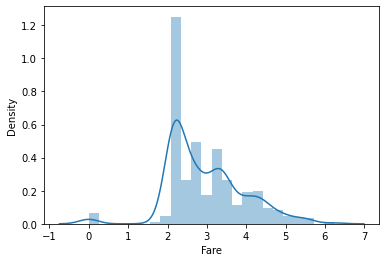

In [998]:
sns.distplot(train['Fare'])
plt.show()

In [999]:
# log를 취했더니 비대칭도가 많이사라졌다.

#### 7.0.8 KNN Scaler 적용

In [1000]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#스탠다드만 사용해본다.

In [1001]:
scaler = StandardScaler()

In [1002]:
#fit 으로 학습
scaler.fit(X_train)
#아직 데이터 안바뀜

StandardScaler()

In [1003]:
#트랜스폼함수
#데이터 범위는 transform 시킬때 바뀐다.
transform_X_train=scaler.transform(X_train)
#데이터 바뀜

In [1004]:
transform_X_test=scaler.transform(X_test)

In [1005]:
transform_X_test

array([[ 0.82274098, -0.53027289, -0.49045775, ...,  0.85999031,
        -0.38951783, -0.16641006],
       [ 0.82274098,  0.68229807,  0.42214887, ..., -1.1628038 ,
         2.56727659, -0.16641006],
       [-0.36428056, -0.22713015, -0.49045775, ...,  0.85999031,
        -0.38951783, -0.16641006],
       ...,
       [ 0.82274098, -0.60605858, -0.49045775, ...,  0.85999031,
        -0.38951783, -0.16641006],
       [ 0.82274098,  0.37915533, -0.49045775, ...,  0.85999031,
        -0.38951783, -0.16641006],
       [ 0.82274098, -0.83341564,  0.42214887, ..., -1.1628038 ,
        -0.38951783, -0.16641006]])

In [1006]:
result=cross_val_score(knn_model, transform_X_train,y_train,cv=5)

In [1007]:
result.mean()

0.7232072719111211

In [1008]:

score_list11=[]
for k in range(1,150):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_result= cross_val_score(knn_model,transform_X_train,y_train,cv=5)
    score_list11.append(knn_result.mean())

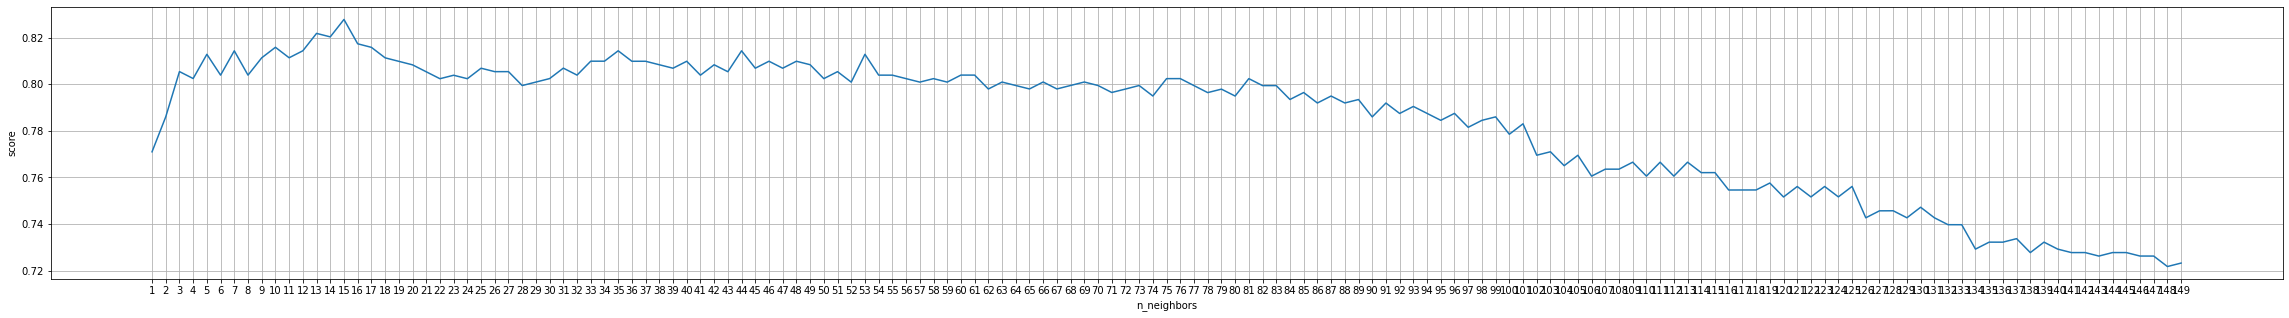

In [1009]:
plt.figure(figsize=(40,5))
plt.plot(range(1,150),score_list11)
plt.xticks(range(1,150))
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.grid()
plt.show()

### 앙상블

##### RandomForest
- 배깅의 대표적인 모델
- Decision Tree 기반의 모델
- 독립적이고 다양한 트리들이 만들어져야함 ->(데이터와 특성을 무작위 추출)


In [1010]:
from sklearn.ensemble import RandomForestClassifier
#분류 : Classifier
#복원하기때문에 중복가능 ex)4번4번4번

In [1011]:
rf_model=RandomForestClassifier(n_estimators=320,   #생성될 나무(모델)수
                               random_state=320,    
                               max_depth=10,        #나무의 최대 깊이
                               max_features=0.5)    #사용할 컬럼의 비율           

In [1012]:
#학습
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=0.5, n_estimators=320,
                       random_state=320)

In [1013]:
#교차검증
rf_result=cross_val_score(rf_model,X_train,y_train,cv=5)
rf_result

array([0.8358209 , 0.8358209 , 0.76865672, 0.82706767, 0.89473684])

In [1014]:
rf_result.mean()

0.8324206037481764

##### 하이퍼파라미터 튜닝
- 복수개의 하이퍼 파라미터를 조정할 때 사용하는 방법 (하이퍼파라미터 튜닝)

In [1015]:
from sklearn.model_selection import GridSearchCV

In [1016]:
# 파라미터 작성
params = {
    'n_estimators' : [1000,1500,2000,3000],
    'max_depth': [5,7,9,11],
    'max_features' : [0.3,0.5,0.7],
    'min_samples_leaf' :[10,20,30]
}

In [1017]:
params

{'n_estimators': [1000, 1500, 2000, 3000],
 'max_depth': [5, 7, 9, 11],
 'max_features': [0.3, 0.5, 0.7],
 'min_samples_leaf': [10, 20, 30]}

In [1018]:
grid = GridSearchCV(rf_model,params,cv=3)

In [1019]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=10, max_features=0.5,
                                              n_estimators=320,
                                              random_state=320),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'max_features': [0.3, 0.5, 0.7],
                         'min_samples_leaf': [10, 20, 30],
                         'n_estimators': [1000, 1500, 2000, 3000]})

In [1021]:
#가장 좋은 파라미터 조합
grid.best_params_

{'max_depth': 5,
 'max_features': 0.3,
 'min_samples_leaf': 10,
 'n_estimators': 1000}

In [1022]:
# 그 때의 성능
grid.best_score_

0.8353330909384721

In [1023]:
#모델
best_model = grid.best_estimator_

In [1024]:
best_model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

##### 부스팅 모델
- 순차적으로 학습을 시킨다(Sequential,시간이 오래 걸린다)
- 이전의 예측 오류를 보완하여 다음 학습 진행

In [1025]:
from sklearn.ensemble import GradientBoostingClassifier

In [1026]:
gb_model = GradientBoostingClassifier(n_estimators=1000,
                                     max_depth=5,
                                     learning_rate=0.01)  #오차를 얼마나 반영할지(학습율)

In [1028]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=1000)

In [1029]:
gb_model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1030]:
gb_model.score(X_train,y_train)

0.968562874251497

In [1031]:
rf_model.score(X_train,y_train)

0.9610778443113772

##### xgboost
- GBM의 느린 수행 시간 ,과적합 규제의 문제 해결(규제 파라미터)
- 캐글 경연대회 상위를 차지한 많은 분석가가 XGBoost를 사용하며 알려짐

In [1032]:
!pip install xgboost

In [1033]:
from xgboost import XGBClassifier

- objective -> binary: (이진분류),multi: softmax(다중분류), reg: squarederror(회귀)
- boostrt -> gbtree,gblinear
- !! 목적에 맞게 설정해줘야 함!
- reg_lambda(L2규제)
- reg_alpha(L1규제)

In [1037]:
xgb_model = XGBClassifier(booster = 'gbtree',objective='biinary:logistic',
                         n_estimators=1000,
                         max_depth=5,
                         learning_rate = 0.001)